# Understanding Dataset

**1) age - Age of the patient**

**2) sex - Sex of the patient**


**3) cp - Chest pain type**:

      0 = Typical Angina: This type of chest pain is often described as a crushing, squeezing, or burning sensation in the chest. It is typically related to physical exertion or emotional stress and is caused by a reduced blood flow to the heart muscle due to narrowed coronary arteries.

      1 = Atypical Angina: Atypical angina is chest pain that doesn't fit the typical pattern of angina. It may be less severe or have different characteristics than typical angina. It can still be related to heart issues but may not be as easily recognized.

      2 = Non-anginal Pain: Non-anginal chest pain is chest discomfort that doesn't appear to be related to the heart. It might be caused by other factors, such as muscle or skeletal issues, gastrointestinal problems, or anxiety.

       3 = Asymptomatic: Asymptomatic individuals do not experience chest pain or any significant symptoms related to heart issues. This group may have other risk factors or diagnostic markers used to predict heart attacks.


**4) trtbps - Resting blood pressure (in mm Hg):**

  Resting blood pressure (trtbps) is related to the risk of a heart attack, and both high and low blood pressure can have implications for cardiovascular health.


**5) chol - Cholestoral in mg/dl fetched via BMI sensor**


**6) fbs - (fasting blood sugar > 120 mg/dl):**

 This is an important factor to consider in heart attack prediction, as it can indicate the presence of diabetes or prediabetes, which are significant risk factors for cardiovascular disease, including heart attacks.

 A fasting blood sugar level greater than 120 mg/dL suggests elevated blood sugar, which could be indicative of prediabetes or diabetes.
          
          1 = True: Means Diabetes is present
          0 = False: Means Diabetes is not present



**7) restecg - Resting electrocardiographic results:**

Resting electrocardiographic results (restecg) in a dataset typically provide information on the electrical activity of an individual's heart while at rest. This information is obtained through an electrocardiogram (ECG or EKG)


        0 = Normal
        1 = ST-T wave normality(This may represent a less severe level of abnormality.)
        2 = Left ventricular hypertrophy(This could indicate a more severe or clinically significant abnormality.)


**8) thalachh - Maximum heart rate achieved:**


**9) oldpeak - Previous peak:**


**10) slp - Slope:**

          Upsloping (slp = 0): An upsloping ST segment typically suggests a benign or non-specific ECG pattern. It's often considered less concerning in terms of cardiac health.

          Flat (slp = 1): A flat ST segment may also be non-specific and less indicative of ischemia or injury to the heart muscle.

          Downsloping (slp = 2): A downsloping ST segment, especially if it occurs during exercise or stress testing, can be more concerning and suggestive of myocardial ischemia, which is insufficient blood flow to the heart muscle. This can be a precursor to a heart attack.


**11) caa - Number of major vessels:**

          This variable typically records the count of major coronary arteries that show significant stenosis or narrowing.
          
          Major vessels in the context of heart health often refer to the coronary arteries that supply blood to the heart muscle.
          
          A value in the "caa" column could range from 0 (no significant stenosis in major vessels) to 3 (significant stenosis in all three major vessels).


**12) thall - Thalium Stress Test result ~ (0,3):**

        Thall = 0: This category may represent a normal or unremarkable thallium stress test result. It suggests that blood flow to the heart muscle is not significantly compromised during both rest and stress conditions.

        Thall = 1: A "thall" value of 1 may indicate mild abnormalities in the thallium stress test results, suggesting some minor irregularities in blood flow, particularly during stress.

        Thall = 2: A "thall" value of 2 may represent moderate abnormalities in the thallium stress test results, suggesting more significant issues with blood flow to the heart muscle, especially during exercise or stress.

        Thall = 3: This category often represents severe abnormalities in the thallium stress test results, indicating that there are substantial issues with blood flow to the heart, both at rest and during stress.


**13) exng - Exercise induced angina:**
        1 = Yes: Individuals with exercise-induced angina (exng = 1) are at higher risk of heart attacks
        
        0 = No: Less Risk of Heart Attack.

        
**14) output - Target variable:**

          0= less chance of heart attack
          1= more chance of heart attack

# Importing Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
#importing dataset"
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Heart Attack Prediction and Web App/heart.csv')

# Data Analysis and Visualization

In [5]:
df.shape

(303, 14)

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1) Checking for Null values in each column

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

So we do not have any Null Values in any of the Column.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Now we will Divide our columns into Categorical, Numerical Columns to process further.

In [9]:
categorical_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
numerical_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

In [10]:
df_cont= df[numerical_cols]

In [11]:
df_cont.describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


**Age Categories with Risk of Hard Attack:**

In [12]:
#people who have risk of heart attack
risk_class= df[df['output'] == 1]

Now risk_class has those people data havingg risk of heart attack.

Top 10 Age Categories with most number of people having Heart Attack Risk:

In [13]:
top_10= risk_class['age'].value_counts().reset_index()
top_10.columns = ['Age Category', 'Count']
top_10= top_10[0:10]
top_10.sort_values(by= 'Count', ascending= True)
top_10

,Age Category,Count
0,54,10
1,51,9
2,41,9
3,52,9
4,44,8
5,57,7
6,42,7
7,58,7
8,45,6
9,53,6


**Visualization 1- Top 10 age categoeies having most people with Risk of Heart Attack:**

In [14]:
age_categories_of_people_having_risk = px.bar(data_frame= top_10,
                                              x= 'Age Category',
                                              y= 'Count')
age_categories_of_people_having_risk.update_layout(
    width=500,  # Width in pixels
    height=400  # Height in pixels
)

Male and Female Numbers in Risky People Data:

In [15]:
male_female_count= risk_class['sex'].value_counts().reset_index()
male_female_count.columns= ['Sex', 'Number of Individual']
male_female_count

,Sex,Number of Individual
0,1,93
1,0,72


In [16]:
male_female_count['Sex'].replace(1, 'Male', inplace= True)
male_female_count['Sex'].replace(0, 'Female', inplace= True)
male_female_count

,Sex,Number of Individual
0,Male,93
1,Female,72


In [17]:
male_female_risk = px.bar(data_frame= male_female_count,
                                              x= 'Sex',
                                              y= 'Number of Individual')
male_female_risk.update_layout(
    width=500,  # Width in pixels
    height=400  # Height in pixels
)

In [18]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

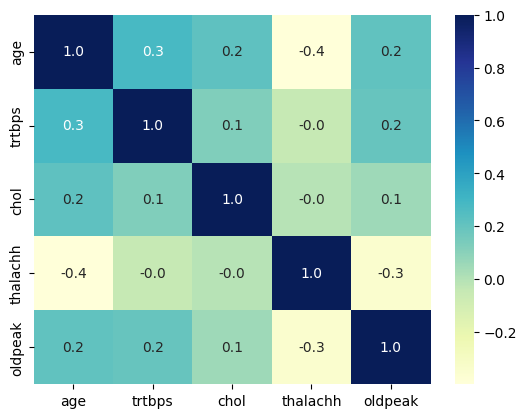

In [19]:
#correlation of numerical columns
coorelation = df_cont.corr()
sns.heatmap(coorelation,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

In [20]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print('Packages imported...')

Packages imported...


In [21]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

In [22]:
# making the features and labels ready for model training
#everything except output
features= df1.drop(['output'],axis=1)
#label
labels = df1[['output']]


In [23]:
# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
features[con_cols] = scaler.fit_transform(features[con_cols])
print("The first 5 rows of X are")
features.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


**Applying Support Vector Classifier:**

In [25]:
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8688524590163934


**Applying Logistic Regression**

In [26]:
lr = LogisticRegression()

# fitting the object
lr.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = lr.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.9016393442622951


**Applying Decision Tree Classifier**

In [27]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7868852459016393


In [28]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.7868852459016393
